<a href="https://colab.research.google.com/github/AkiraNom/data_analysis_notebook/blob/main/EDA_stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Try to answer the following question along the EDA:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' daily returns?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import yfinance as yf

from datetime import datetime 

In [ ]:
# set query ticker lists
tick_lists = ['AAPL','MSFT','AMZN','TSLA']

# set time range to download
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# download stock data from yfinance
data = yf.download(tick_lists, start=start, end=end, group_by='ticker')
data.head()

[*********************100%***********************]  4 of 4 completed


AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2022-05-27  145.389999  149.679993  145.259995  149.639999  148.751770   
2022-05-31  149.070007  150.660004  146.839996  148.839996  147.956512   
2022-06-01  149.899994  151.740005  147.679993  148.710007  147.827301   
2022-06-02  147.830002  151.270004  146.860001  151.210007  150.312454   
2022-06-03  146.899994  147.970001  144.460007  145.380005  144.517059   

                             AMZN                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2022-05-27   90978500  113.550003  115.186996  112.627998  115.146500  ...   
2022-05-31  103718400  116.279999  121.994499  115.675003  120.209503  ...   
2022-06-01   74286600  122.255997  125.179001  120.622498  121.683998  ...   
2022-06-02   72348100  121.683998  125.610001  120.044998  125.511002  ...   
2022-06-03   88570300  124.199997  124.400002  121.046501  122.349998  ...   

                  TSLA                                           MSFT  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2022-05-27  240.176666  253.210007  253.210007   89295000  268.480011   
2022-05-31  244.743332  252.753326  252.753326  101914500  272.529999   
2022-06-01  243.639999  246.789993  246.789993   77247900  275.200012   
2022-06-02  242.066666  258.333344  258.333344   93473100  264.450012   
2022-06-03  233.416672  234.516663  234.516663  112393800  270.309998   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2022-05-27  273.339996  267.559998  273.239990  270.624054  26910800  
2022-05-31  274.769989  268.929993  271.869995  269.267181  37827700  
2022-06-01  277.690002  270.040009  272.420013  269.811920  25292200  
2022-06-02  274.649994  261.600006  274.579987  271.951233  44008200  
2022-06-03  273.450012  268.410004  270.019989  267.434937  28059000  

[5 rows x 24 columns]

In [ ]:
# summary stats
data.describe()

AAPL                                                  \
             Open        High         Low       Close   Adj Close   
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   151.165060  153.076614  149.543227  151.432948  150.928104   
std     12.157287   11.928096   12.416155   12.242680   12.302621   
min    126.010002  127.769997  124.169998  125.019997  124.656975   
25%    142.699997  144.665001  140.934998  142.915001  142.287247   
50%    149.779999  151.570007  148.039993  150.649994  150.083237   
75%    160.574997  162.250000  159.425003  160.510002  160.288300   
max    176.389999  176.389999  174.940002  175.429993  175.429993   

                           AMZN                                      ...  \
             Volume        Open        High         Low       Close  ...   
count  2.510000e+02  251.000000  251.000000  251.000000  251.000000  ...   
mean   7.416317e+07  107.864940  109.686974  106.084809  107.936777  ...   
std    2.237534e+07   14.928167   15.168917   14.825556   14.984576  ...   
min    3.519590e+07   82.800003   83.480003   81.430000   81.820000  ...   
25%    5.811600e+07   96.035000   97.544998   94.195000   96.259998  ...   
50%    7.046270e+07  104.470001  106.239998  103.209999  104.980003  ...   
75%    8.410325e+07  116.730000  118.744999  114.775002  116.605000  ...   
max    1.647624e+08  143.910004  146.570007  142.000000  144.779999  ...   

             TSLA                                              MSFT  \
              Low       Close   Adj Close        Volume        Open   
count  251.000000  251.000000  251.000000  2.510000e+02  251.000000   
mean   205.511009  210.608473  210.608473  1.165257e+08  260.892590   
std     50.513751   51.177382   51.177382  4.855343e+07   23.552489   
min    101.809998  108.099998  108.099998  4.186470e+07  217.550003   
25%    172.504997  178.474998  178.474998  7.985170e+07  243.160004   
50%    192.889999  197.580002  197.580002  1.034727e+08  256.750000   
75%    238.076668  242.133331  242.133331  1.461778e+08  277.110001   
max    305.579987  309.320007  309.320007  3.065906e+08  324.019989   

                                                                     
             High         Low       Close   Adj Close        Volume  
count  251.000000  251.000000  251.000000  251.000000  2.510000e+02  
mean   264.048725  258.042031  261.241434  259.781302  2.891535e+07  
std     23.395864   23.790421   23.833277   24.029299  1.015345e+07  
min    220.410004  213.429993  214.250000  212.649261  9.200800e+06  
25%    245.305000  240.264999  242.354996  240.913612  2.249105e+07  
50%    259.880005  253.300003  256.480011  254.262238  2.673030e+07  
75%    280.485001  275.154999  276.395004  275.083832  3.204340e+07  
max    333.399994  323.880005  332.890015  332.890015  8.610200e+07  

[8 rows x 24 columns]

In [ ]:
# chekc data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-05-27 to 2023-05-26
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (AAPL, Open)       251 non-null    float64
 1   (AAPL, High)       251 non-null    float64
 2   (AAPL, Low)        251 non-null    float64
 3   (AAPL, Close)      251 non-null    float64
 4   (AAPL, Adj Close)  251 non-null    float64
 5   (AAPL, Volume)     251 non-null    int64  
 6   (AMZN, Open)       251 non-null    float64
 7   (AMZN, High)       251 non-null    float64
 8   (AMZN, Low)        251 non-null    float64
 9   (AMZN, Close)      251 non-null    float64
 10  (AMZN, Adj Close)  251 non-null    float64
 11  (AMZN, Volume)     251 non-null    int64  
 12  (TSLA, Open)       251 non-null    float64
 13  (TSLA, High)       251 non-null    float64
 14  (TSLA, Low)        251 non-null    float64
 15  (TSLA, Close)      251 non-null    float64
 16  (TSLA, 

## 1. What was the change in price of the stock over time?

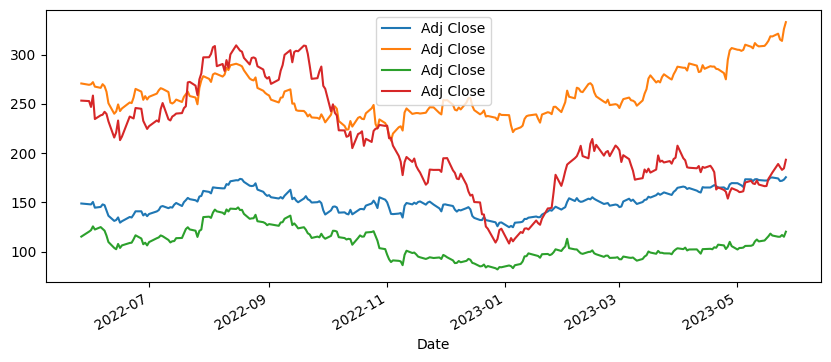

In [ ]:
# plot the historical adj close value 
for i in tick_lists:
  data[i]['Adj Close'].plot(legend=True,figsize=(10,4))

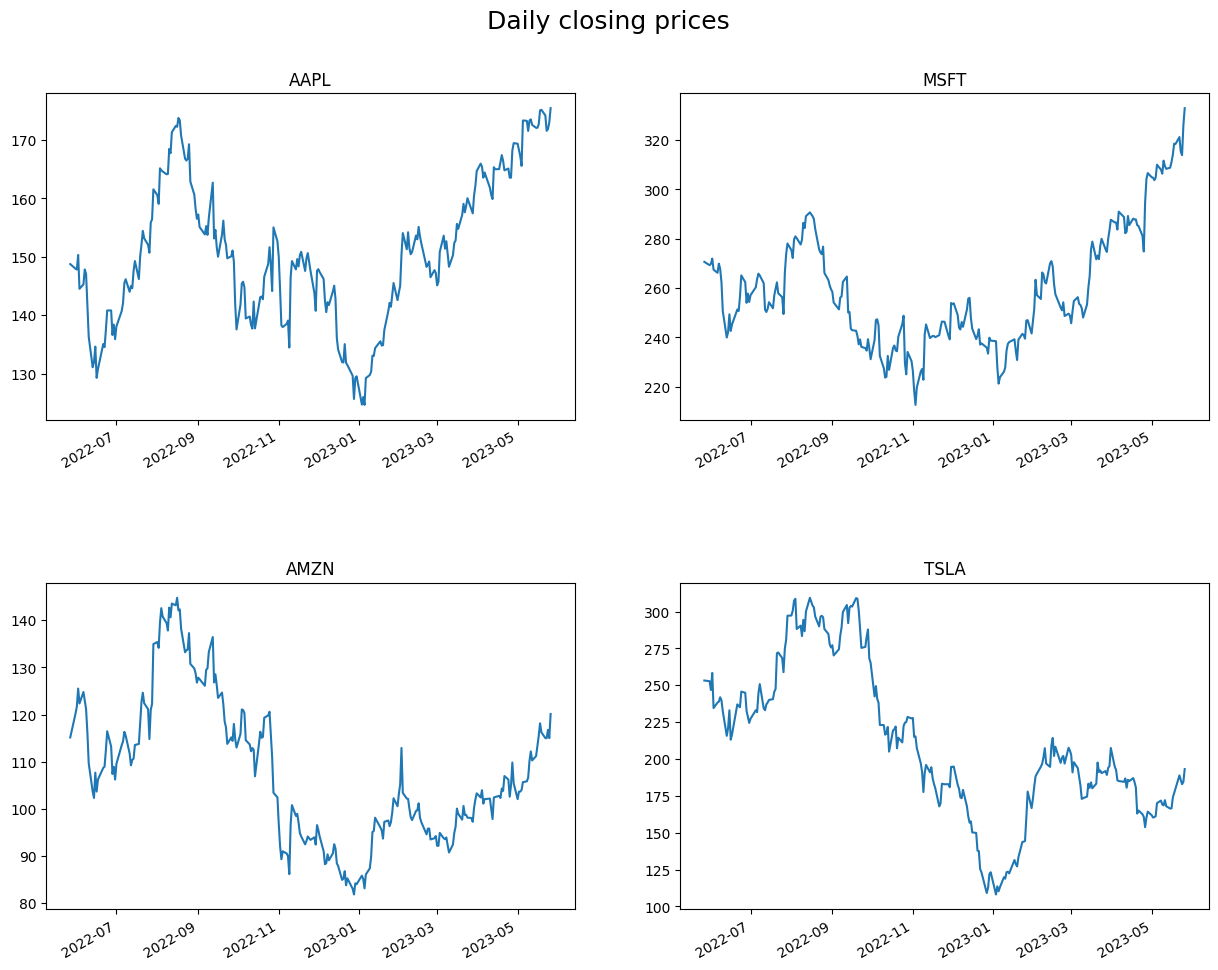

In [ ]:
# plot daily close price in the separated graphs
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Daily closing prices', fontsize=18, y=0.95)

for tick, ax in zip(tick_lists, axs.ravel()):
  data[tick]['Adj Close'].plot(ax=ax)

  # chart formatting
  ax.set_title(tick.upper())
  ax.set_xlabel("")

plt.show()

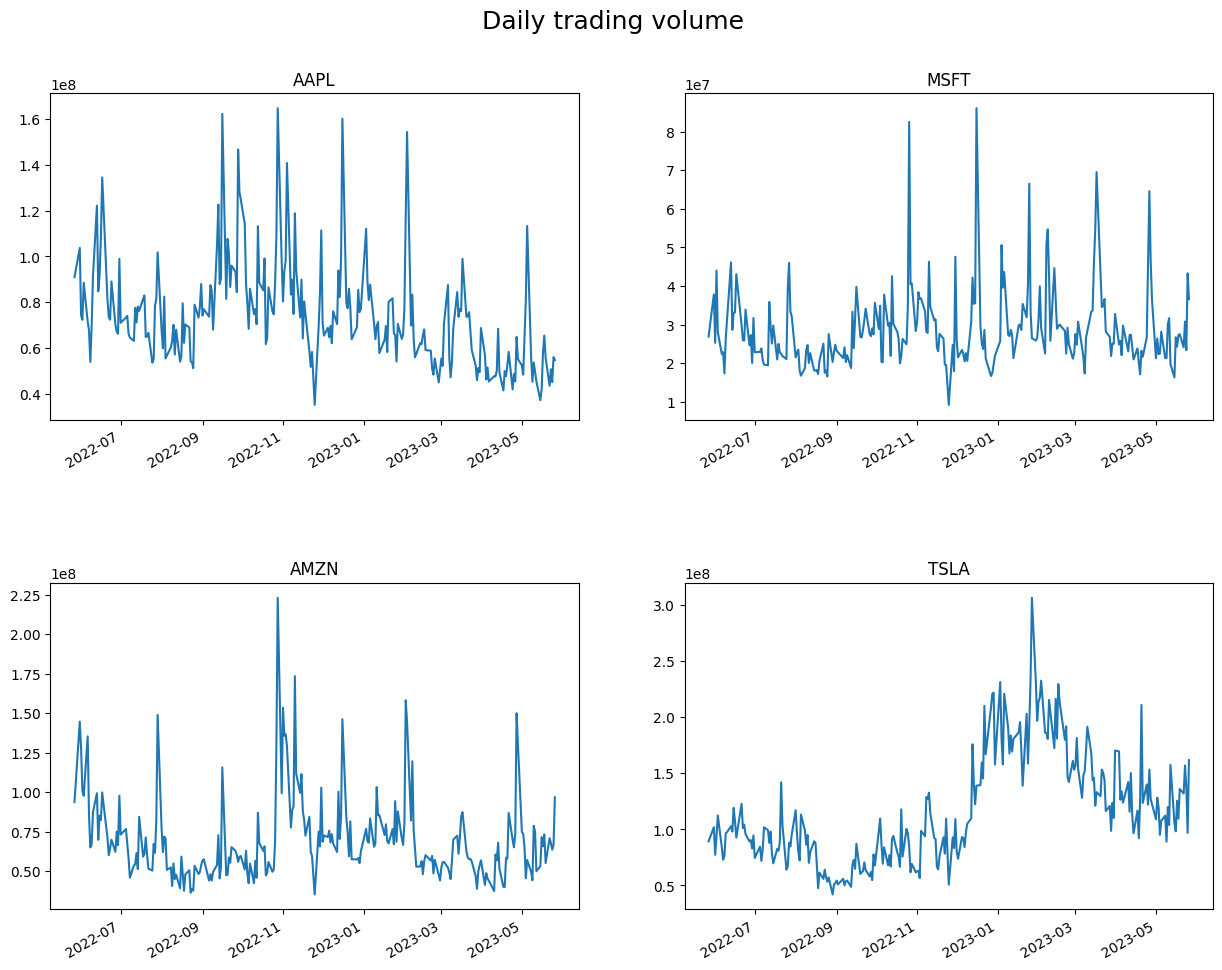

In [ ]:
# plot change in trading volume
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Daily trading volume', fontsize=18, y=0.95)

for tick, ax in zip(tick_lists, axs.ravel()):
  data[tick]['Volume'].plot(ax=ax)

  # chart formatting
  ax.set_title(tick.upper())
  ax.set_xlabel("")

plt.show()

## 2.) What was the daily return of the stock on average?

<Axes: xlabel='Date'>

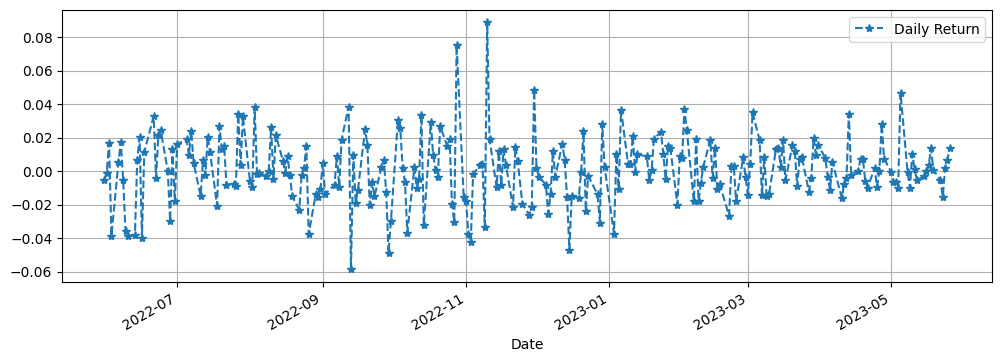

In [ ]:
# only use apple data
df_aapl =data['AAPL'].copy()

df_aapl.loc[:,'Daily Return'] = df_aapl['Adj Close'].pct_change()
df_aapl[['Daily Return']].plot(figsize=(12,4),legend=True,linestyle='--',marker='*',grid=True)

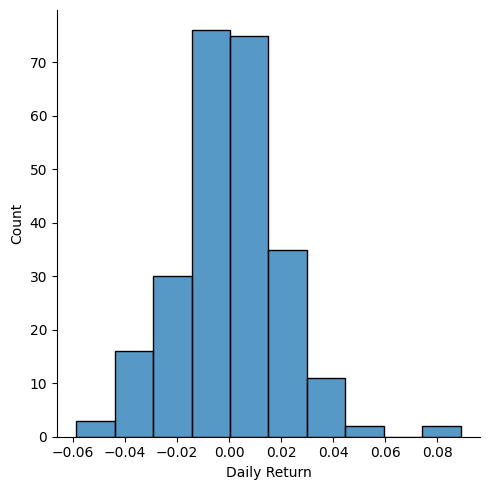

In [ ]:
# plot histogram of daily return
sns.displot(df_aapl['Daily Return'].dropna(),bins=10)

## 3. What was the moving average of the various stocks?


In [ ]:
window_sizes = [5,10,25]
for window in window_sizes:
  df_aapl.loc[:,f'MA{window}']=df_aapl['Adj Close'].rolling(window).mean()

<Axes: xlabel='Date'>

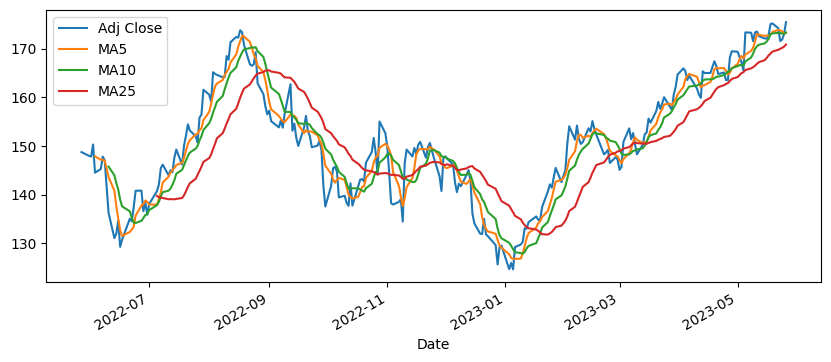

In [ ]:
df_aapl[['Adj Close','MA5','MA10','MA25']].plot(subplots=False,figsize=(10,4))

## 4.) What was the correlation between different stocks' daily returns?


In [ ]:
# create a dataframe of adj close price for each price
df_close = pd.concat([data['AAPL']['Adj Close'],
                      data['AMZN']['Adj Close'],
                      data['MSFT']['Adj Close'],
                      data['TSLA']['Adj Close']],
                     axis=1,
                     keys=['AAPL','AMZN','MSFT','TSLA'])
df_close

,AAPL,AMZN,MSFT,TSLA
Date,,,,
2022-05-27,148.751770,115.146500,270.624054,253.210007
2022-05-31,147.956512,120.209503,269.267181,252.753326
2022-06-01,147.827301,121.683998,269.811920,246.789993
2022-06-02,150.312454,125.511002,271.951233,258.333344
2022-06-03,144.517059,122.349998,267.434937,234.516663
...,...,...,...,...
2023-05-22,174.199997,115.010002,321.179993,188.869995
2023-05-23,171.559998,114.989998,315.260010,185.770004
2023-05-24,171.839996,116.750000,313.850006,182.899994


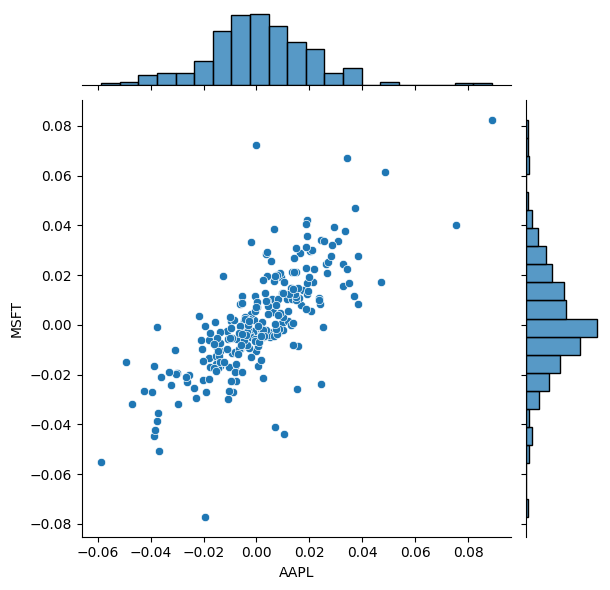

In [ ]:
# look at correlation between aaple daily reutrn and microsoft daily return
returns = df_close.pct_change()
sns.jointplot(data=returns,x='AAPL',y='MSFT',kind='scatter')

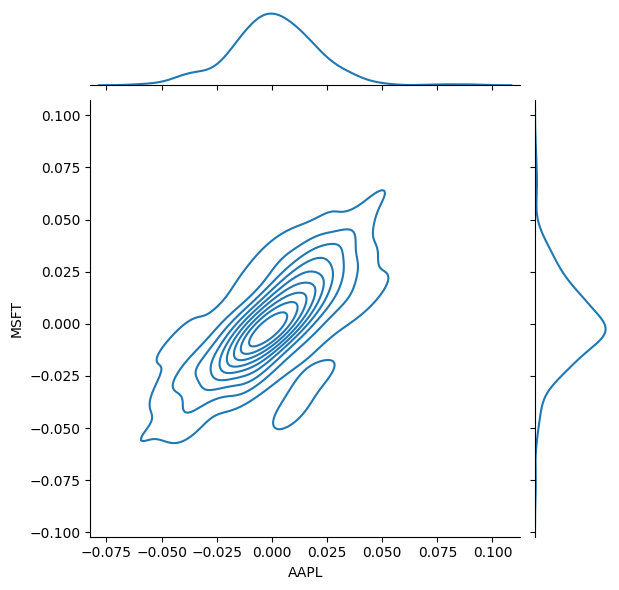

In [ ]:
sns.jointplot(data=returns,x='AAPL',y='MSFT',kind='kde')

Text(0.5, 1.05, 'Correlation of Daily Return')

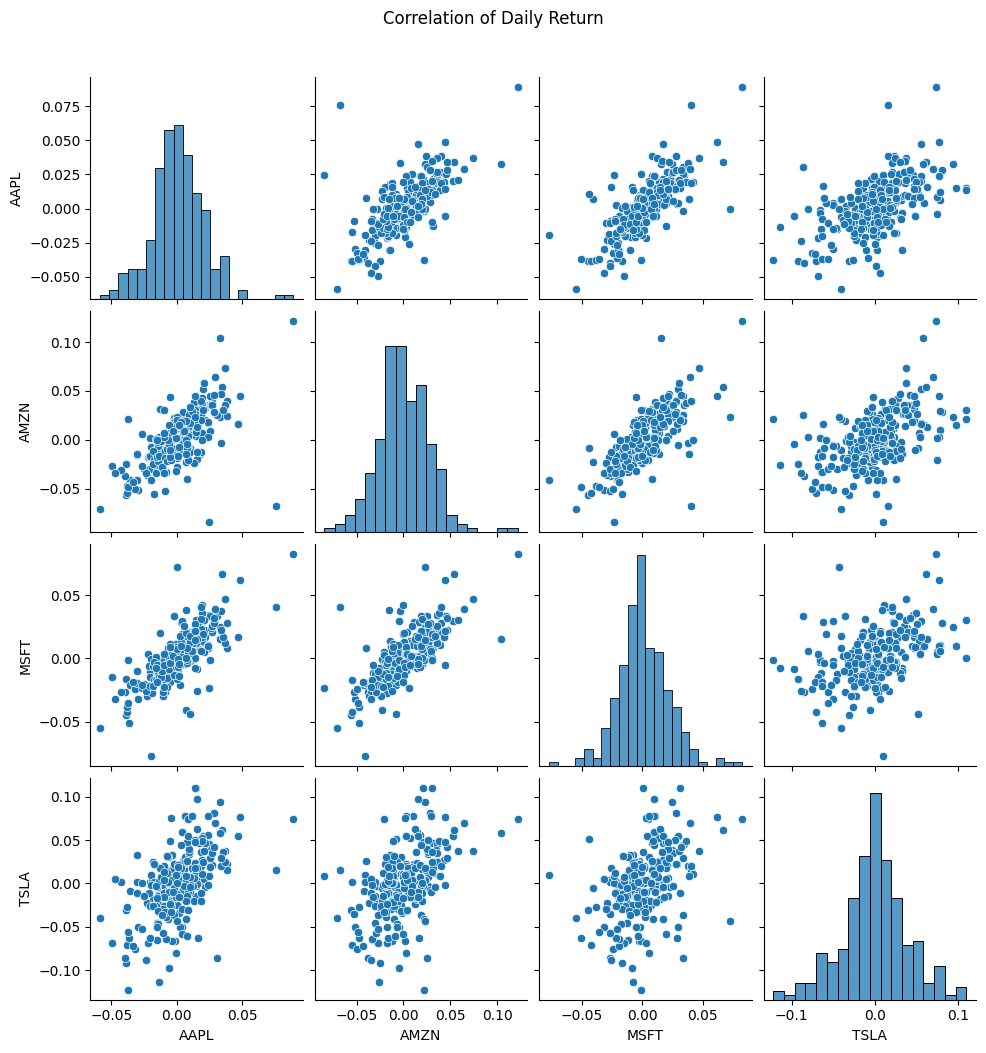

In [ ]:
# a pairplot in seaborn can plot all correlation plots once
g= sns.pairplot(data=returns)
g.fig.suptitle('Correlation of Daily Return', y=1.05)

Text(0.5, 1.05, 'Correlation of Daily Return')

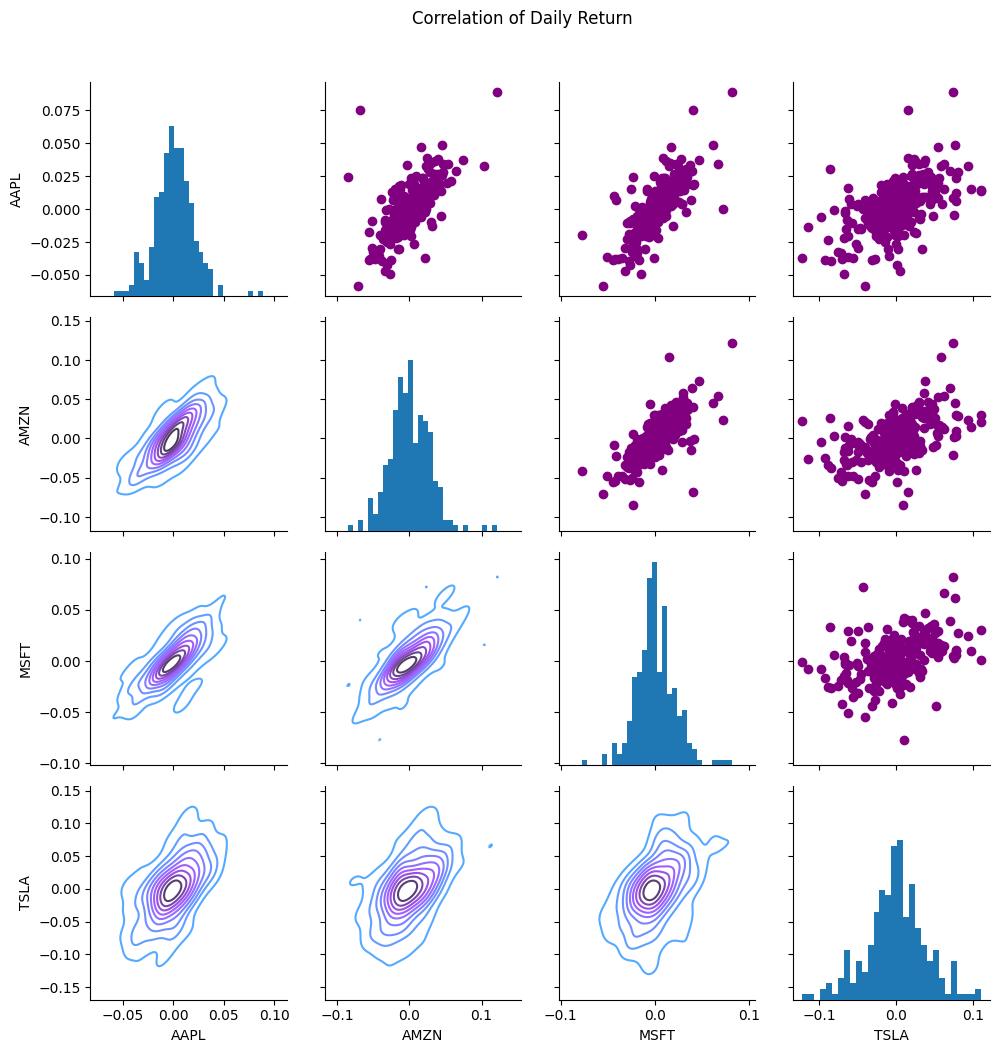

In [ ]:
# modify visualization of the pairplot
returns_fig = sns.PairGrid(returns)

# Using map_upper, specify a plot type, color etc in the upper triangle.
returns_fig.map_upper(plt.scatter,color='purple')

# Using map_lower, specify the property in the lower triangle
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# plot the fig
g= returns_fig.map_diag(plt.hist,bins=30)
g.fig.suptitle('Correlation of Daily Return', y=1.05)

Text(0.5, 1.0, 'Daily return Heatmap')

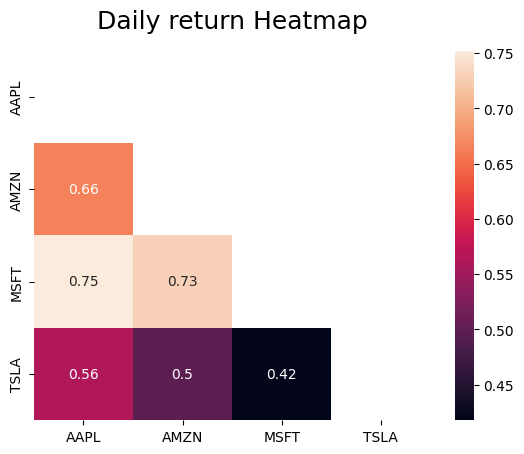

In [ ]:
# another way to visualize correatlion
mask = np.triu(np.ones_like(returns.corr(), dtype=bool))
heatmap= sns.heatmap(returns.corr(),mask=mask,annot=True)
heatmap.set_title('Daily return Heatmap', fontdict={'fontsize':18}, pad=16)

## 5.) How much value do we put at risk by investing in a particular stock?

Use the sharpe ratio

`sharp ratio = mean of daily return / std of daily return`


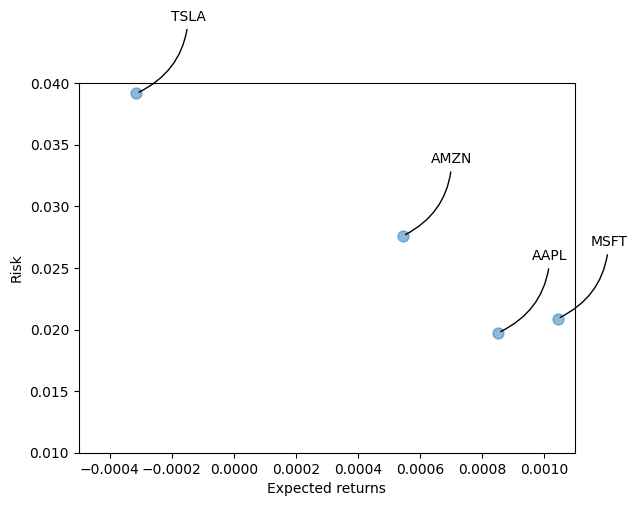

In [ ]:
rets = returns.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# set the x and y limit
plt.ylim([0.01,0.04])
plt.xlim([-0.0005,0.0011])

#Set the axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [ ]:
sharp_ratio = []
for tick in tick_lists:

  sharp_ratio.append(returns[tick].mean()/returns[tick].std())

pd.DataFrame(sharp_ratio, index=tick_lists, columns=['Sharp Ratio'])

,Sharp Ratio
AAPL,0.043228
MSFT,0.050035
AMZN,0.019783
TSLA,-0.008019


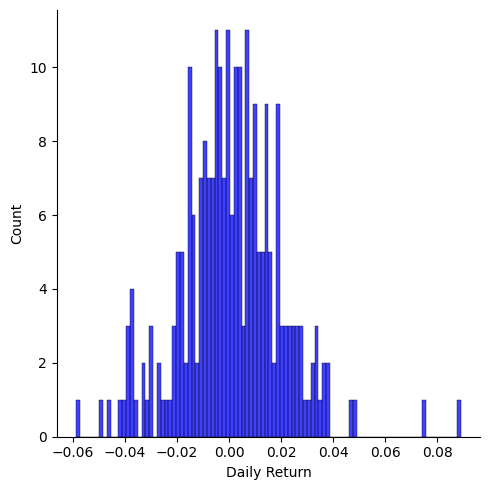

In [ ]:
sns.displot(df_aapl['Daily Return'].dropna(),bins=100, color='blue')

In [ ]:
df_aapl['Daily Return'].quantile(0.05)

-0.034711172722579633

With 95% considnece, the worst daily loss will not exceed 3.4% of the investment.

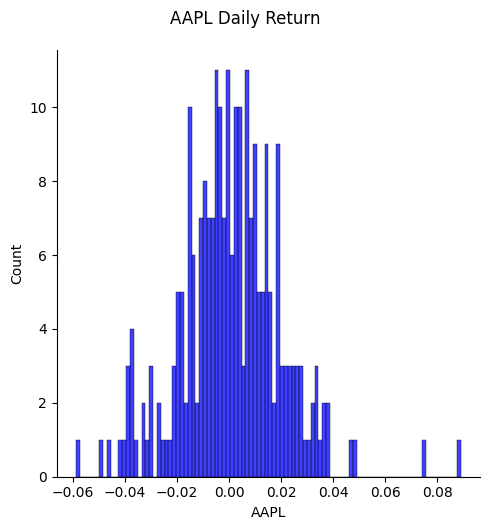

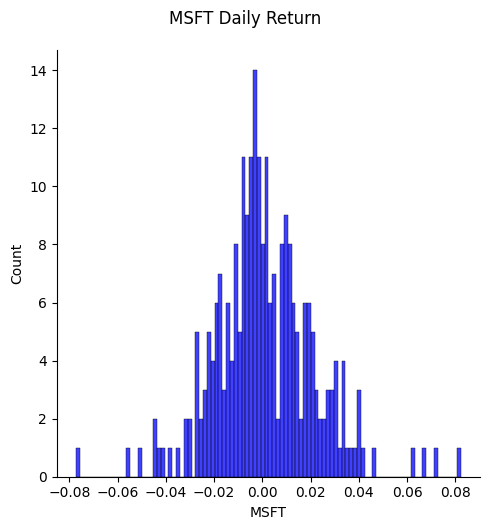

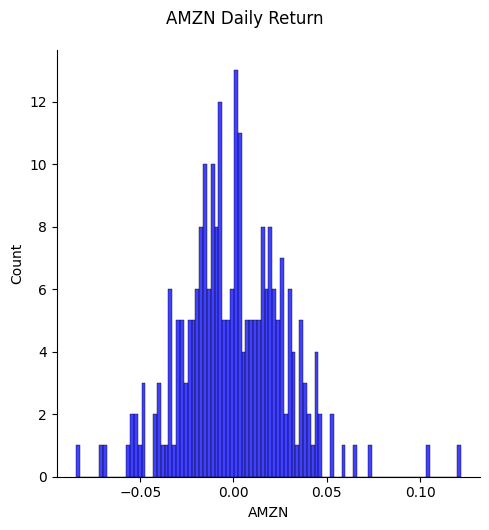

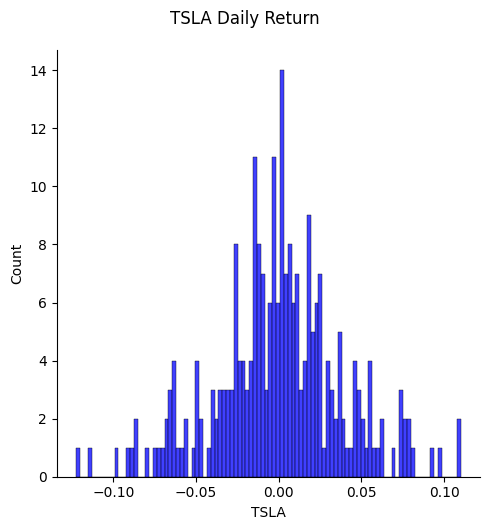

In [ ]:
# extimate 5% loss with each stock
loss = []
for tick in tick_lists:
  g=sns.displot(returns[tick].dropna(),bins=100, color='blue')
  g.fig.suptitle(f'{tick} Daily Return', y=1.05)

  # calculate 5% quantile of daily returns,
  loss.append(returns[tick].dropna().quantile(0.05)*100)

In [ ]:
# dataframe of 5% loss in each stock
pd.DataFrame(loss, index=tick_lists, columns=['5% loss(%)'])

,5% loss(%)
AAPL,-3.471117
MSFT,-2.834894
AMZN,-4.215073
TSLA,-6.736880


The TSLA stock has a higher risk than any other stocks.

## 6.) How can we attempt to predict future stock behavior?
Estimate a future price using monte carlo method

$ \hspace{1.5cm} \Delta S/ S = \mu \Delta t + \sigma \epsilon \sqrt(\Delta t)$ <br>

Multiply by S, <br>

$ \hspace{1.5cm} \Delta S = S*(\mu \Delta t + \sigma \epsilon \sqrt(\Delta t)$ <br>

where: <br>
$\hspace{2cm}$S : current stock price <br>
$\hspace{2cm} \mu $: expected return <br>
$\hspace{2cm} \sigma $: risk <br>

> The first term is a "drift" and the second term is a "shock." For each time period, our model assumes the price will "drift" up by the expected return. But the drift will be shocked (added or subtracted) by a random shock. The random shock will be the standard deviation "s" multiplied by a random number "e." This is simply a way of scaling the standard deviation.<br>
-invespedia



For detailed info on the Monte Carlo method for stock, please check [invespedia](https://www.investopedia.com/articles/07/montecarlo.asp)

In [ ]:
# Set the duration of simulation
# end
days = 365
# start
dt = 1/days

# the historical expected return
mu = returns.mean()['AAPL']

# the historical volatility of apple
sigma = returns.std()['AAPL']

In [ ]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' 
      This function takes in starting stock price, days of simulation,mu,sigma, 
      and returns simulated price array
    '''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # set schok and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate schock, drift and price
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [ ]:
df_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,MA5,MA10,MA25
Date,,,,,,,,,,
2023-05-22,173.979996,174.710007,173.449997,174.199997,174.199997,43570900,-0.005481,173.834003,173.217305,169.754357
2023-05-23,173.130005,173.380005,171.279999,171.559998,171.559998,50747300,-0.015155,173.732001,173.220030,169.967154
2023-05-24,171.089996,172.419998,170.520004,171.839996,171.839996,45143500,0.001632,173.562000,173.072003,170.144815
2023-05-25,172.410004,173.899994,171.690002,172.990005,172.990005,56058300,0.006692,173.150000,173.020003,170.407623
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54794100,0.014105,173.203998,173.306001,170.833140


Text(0.5, 1.0, 'Monte Carlo Analysis for AAPLE')

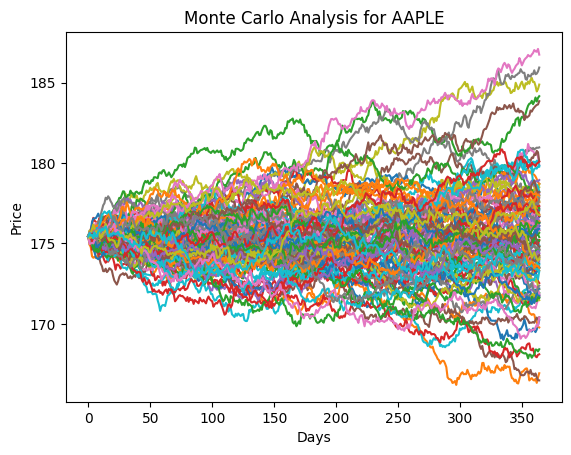

In [ ]:
# Get the last adj close value for the apple 
start_price = df_aapl['Adj Close'][-1]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for AAPLE')

Increase the number of runs to extimate future stock price

In [ ]:
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):    
    # append the last stock price for each run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

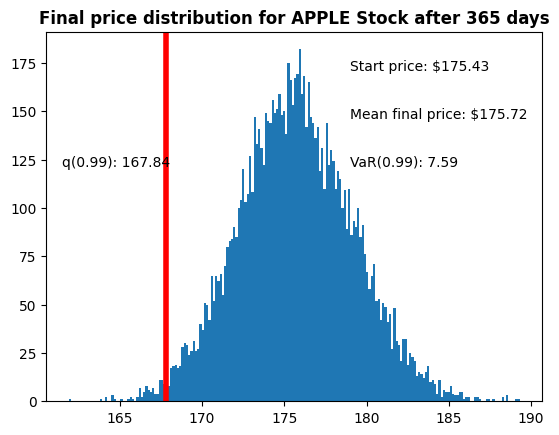

In [ ]:
# define q as the 1% qunatile
q = np.percentile(simulations, 1)
    
# plot the distribution of the last prices
plt.hist(simulations,bins=200)

# show additional information onto the plot
# Starting Price
plt.figtext(0.6, 0.8, s=f"Start price: ${start_price:.2f}")
# Mean ending price
plt.figtext(0.6, 0.7, f"Mean final price: ${simulations.mean():.2f}")

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, f"VaR(0.99): {(start_price - q):.2f}")

# Display 1% quantile
plt.figtext(0.15, 0.6, f"q(0.99): {q:.2f}")

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(f"Final price distribution for APPLE Stock after {days} days", weight='bold');

 The Value at Risk for the APPLE stock, which looks to be $7.59 for every investment of 175.43 (the price of one inital stock).

In [ ]:
data['TSLA']['Adj Close'][-1]

193.1699981689453

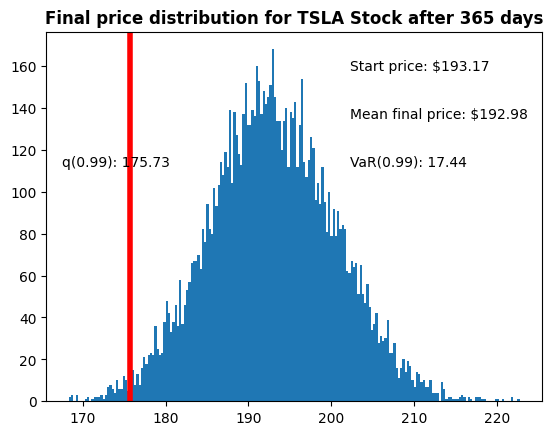

In [ ]:
# Try with tesla stock
tick = 'TSLA'

# the historical expected return
mu = returns.mean()[tick]

# the historical volatility
sigma = returns.std()[tick]

start_price = data[tick]['Adj Close'][-1]

days = 365
dt = 1/days

runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):    
    # append the last stock price for each run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

# define q as the 1% qunatile
q = np.percentile(simulations, 1)
    
# plot the distribution of the last prices
plt.hist(simulations,bins=200)

# show additional information onto the plot
# Starting Price
plt.figtext(0.6, 0.8, s=f"Start price: ${start_price:.2f}")
# Mean ending price
plt.figtext(0.6, 0.7, f"Mean final price: ${simulations.mean():.2f}")

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, f"VaR(0.99): {(start_price - q):.2f}")

# Display 1% quantile
plt.figtext(0.15, 0.6, f"q(0.99): {q:.2f}")

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(f"Final price distribution for {tick} Stock after {days} days", weight='bold');

Comared with the AAPLE stock, the TESLA have a higer risk.